## folger pinnacle jul-aug 2021 hypoxic event

In [ ]:
import onc
import os
import helpers_hypoxic as hh

#token = os.environ["TRICY_TOKEN"]
from dotenv import load_dotenv
load_dotenv()
token = os.getenv("ONC_TOKEN")

# Create ONC client
my_onc = onc.ONC(token)

Defining Hypoxia

"In ocean and freshwater environments, the term "hypoxia" refers to low or depleted oxygen in a water body." - https://oceanservice.noaa.gov/hazards/hypoxia/#:~:text=Graphic%20credit%3A%20Louisiana%20Universities%20Marine,oxygen%20in%20a%20water%20body.

"low levels of dissolved oxygen (less than 2-3 milligrams of oxygen per liter of water)" - https://www.epa.gov/ms-htf/hypoxia-101 



Effects of Hypoxia

- Deadzones
- 

Key Inidicators of Hypoxia

1. Oxygen Concentration and Saturation


2. Chloropyll
3. PAR (Photosynthetically Active Radiation)
4. Turbidity
5. Temperature
6. Salinity
7. Apparent Oxygen Utilization

In [14]:
# dates of interest: July through August 2021
# specifically Jul 8 - Aug 11
dateFrom = "2021-07-15T00:00:00.000Z"
dateTo = "2021-07-17T00:00:00.000Z"

In [15]:
# properties of interest
propCodes = ["oxygen", "parphotonbased", "chlorophyll", "seawatertemperature", "salinity", "turbidityntu"]

# fetch dataframe of properties data
merged_indicators = hh.get_dataframe(start=dateFrom, end=dateTo, props=propCodes)


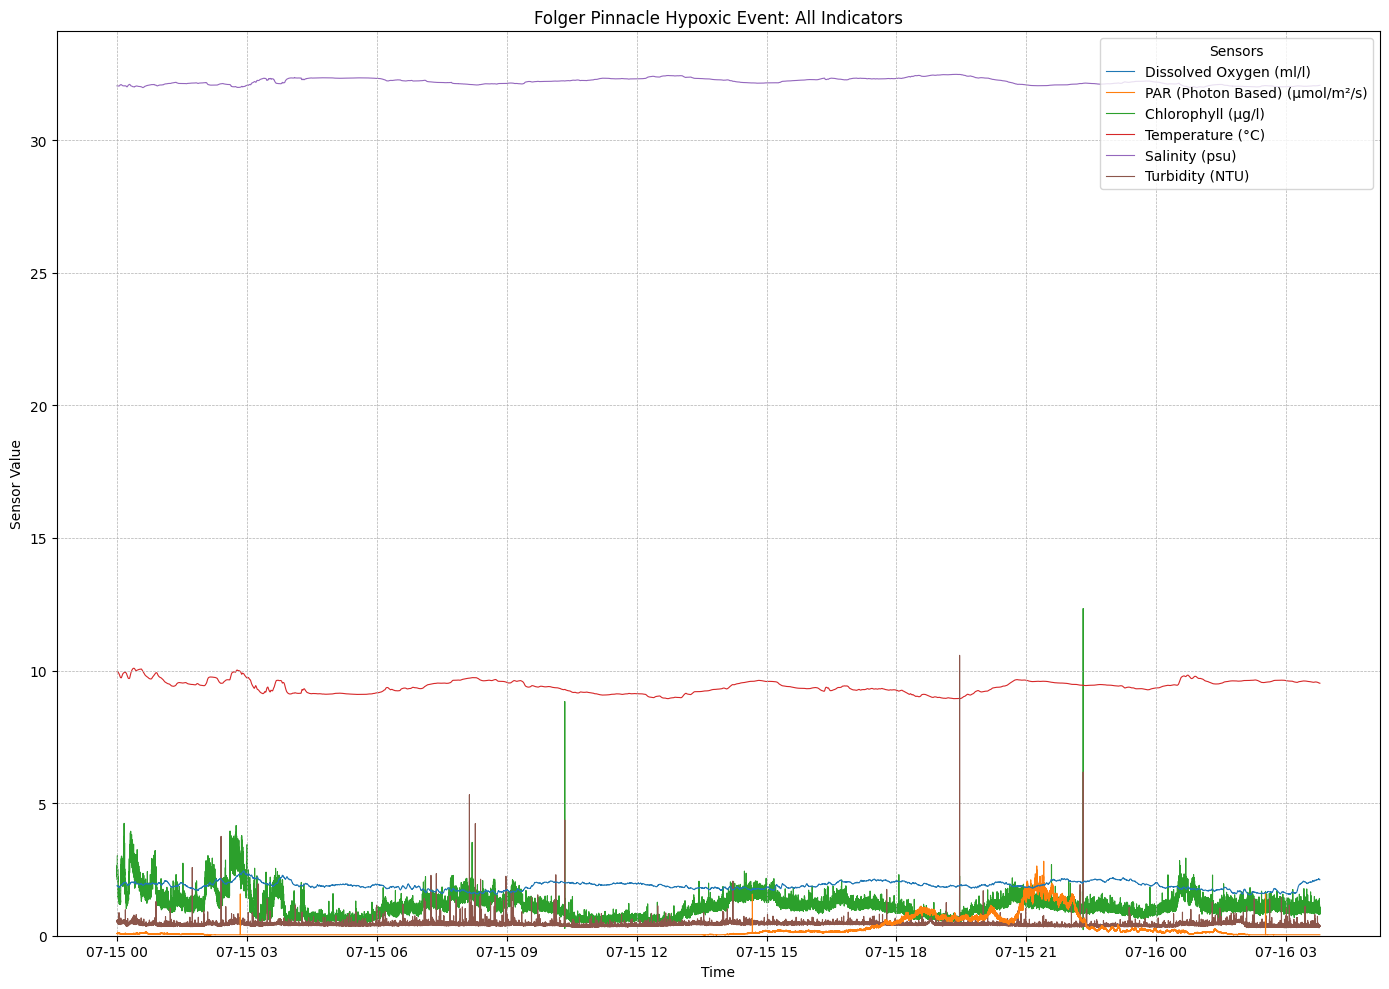

In [16]:
# plot all indicators
hh.plot_all_sensors(df=merged_indicators, title="Folger Pinnacle Hypoxic Event: All Indicators")

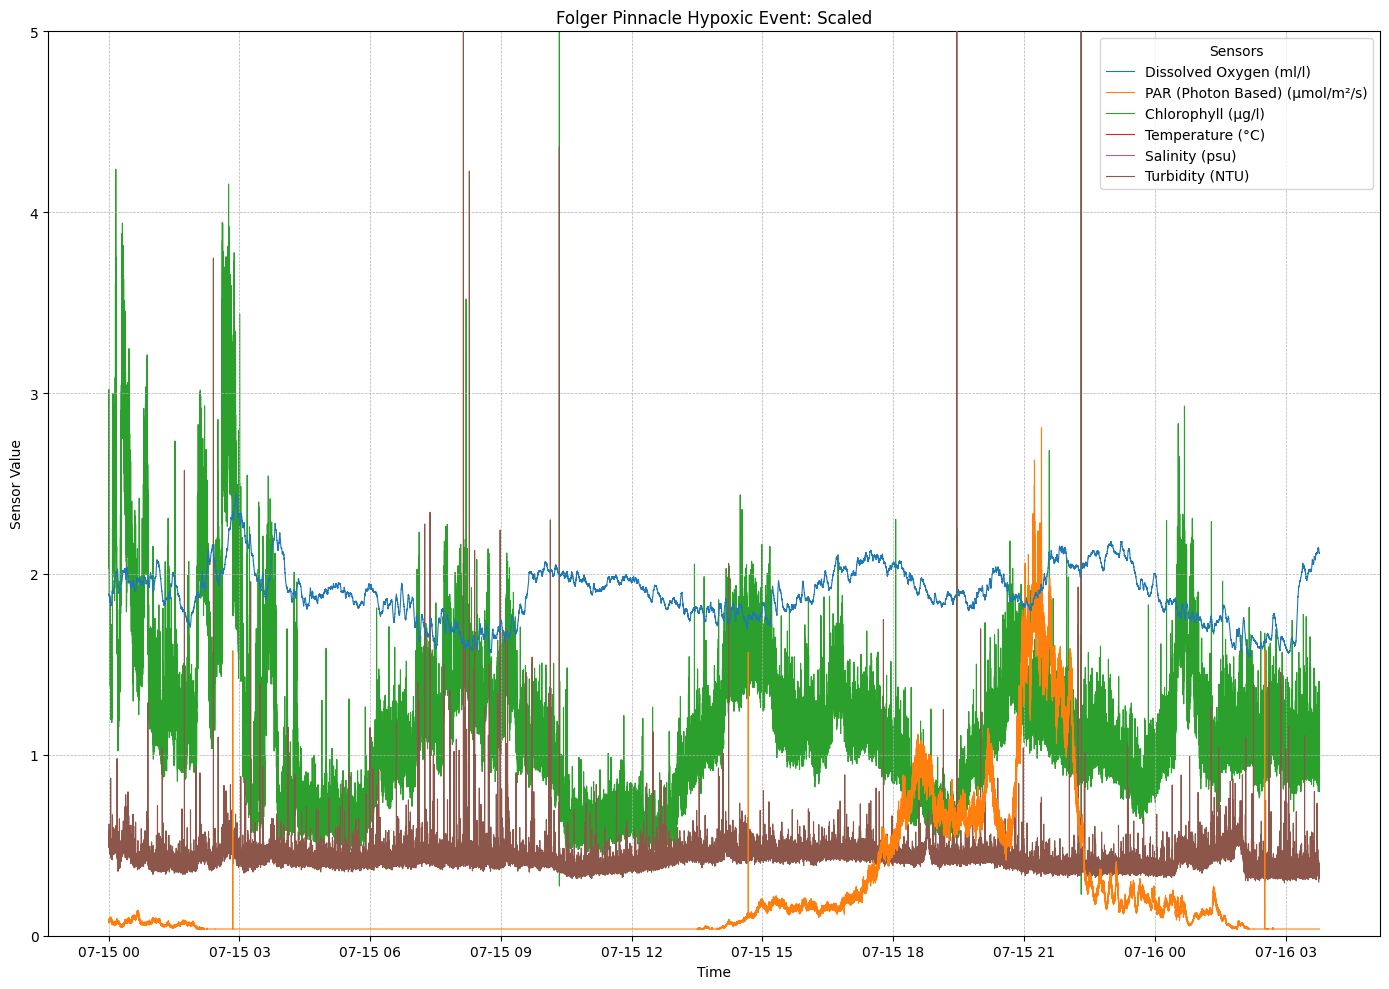

In [17]:
# plot all indicators with scale
hh.plot_all_sensors(df=merged_indicators, title="Folger Pinnacle Hypoxic Event: Scaled", ymax=5)